In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [60]:
def print_percentiles(c, name):
	print('-----------------------------\n')
	print('percentile values distribution for %s\n' % name)

	print('50th Percentile:%f\n' % c.Percentile(50))
	print('90th Percentile:%f\n' % c.Percentile(90))
	print('99th Percentile:%f\n' % c.Percentile(99))
	print('25th Percentile:%f\n' % c.Percentile(25))
	print('75th Percentile:%f\n' % c.Percentile(75))
	print('20th Percentile:%f\n' % c.Percentile(50))
	print('40th Percentile:%f\n' % c.Percentile(90))
	print('60th Percentile:%f\n' % c.Percentile(99))
	print('80th Percentile:%f\n' % c.Percentile(25))

	print('-----------------------------\n')

In [61]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [62]:
%autosave 0

Autosave disabled


In [63]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [65]:
tcp_tls_data = "./data/India/tls_perf/output_curl_india.csv"
quic_data = "./data/India/quic_perf/output_quic_india.csv"

In [66]:
t = pd.read_csv(quic_data,';')
s = pd.read_csv(tcp_tls_data,';')

In [67]:
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [68]:
t = t.dropna()
s=s.dropna()

In [69]:
s.count()

TimeOfMeasurement              160464
Url                            160464
Ip                             160464
Port                           160464
DnsLookupTime                  160464
TCPHandshakeTime               160464
ConnectionEstablishmentTime    160464
TTFB                           160464
TotalDownloadTime              160464
HttpResponse                   160464
HTTPVersion                    160464
Protocol                       160464
dtype: int64

In [70]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,1.545245e+09,www.google.com,172.217.26.228,443,125.006,118.802,777.747,951.603,1113.127,200,HTTP/1.1,TCP/TLS1.2
1,1.545245e+09,www.google.com,216.58.220.4,443,252.896,151.938,813.923,1002.453,1131.369,200,HTTP2,TCP/TLS1.2
2,1.545245e+09,www.youtube.com,216.58.200.142,443,124.812,101.874,617.427,791.292,3374.668,200,HTTP/1.1,TCP/TLS1.2
3,1.545245e+09,www.youtube.com,172.217.163.206,443,124.701,78.315,609.706,736.734,3305.810,200,HTTP2,TCP/TLS1.2
4,1.545245e+09,www.google.co.in,172.217.167.163,443,124.781,75.469,540.678,709.866,835.008,200,HTTP/1.1,TCP/TLS1.2


In [71]:
t.count()

TimeOfMeasurement              436499
Url                            436499
Path                           436499
Ip                             436499
Port                           436499
DNSTime                        436499
ConnectionEstablishmentTime    436499
TTFB                           436499
TotalDownloadTime              436499
HttpResponse                   436499
Protocol                       436499
dtype: int64

In [72]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.545245e+09,www.google.com,/,172.217.26.228,443.0,69.310,461.907,697.371,303.108,200.0,Q044
1,1.545245e+09,www.google.com,/,172.217.27.196,443.0,122.884,421.930,596.049,613.477,200.0,Q043
2,1.545245e+09,www.google.com,/,172.217.26.228,443.0,125.647,346.224,515.496,533.357,200.0,Q039
3,1.545245e+09,www.google.com,/,216.58.199.132,443.0,165.416,455.656,671.711,698.869,200.0,Q035
8,1.545245e+09,www.youtube.com,/,216.58.197.46,443.0,149.751,285.099,436.451,805.459,200.0,Q044


In [73]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [74]:
s['TimeOfMeasurement'] = s['TimeOfMeasurement'].apply(timestamp2human)

In [75]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Wed Dec 19 18:43:07 2018,www.google.com,172.217.26.228,443,125.006,118.802,777.747,951.603,1113.127,200,HTTP/1.1,TCP/TLS1.2
1,Wed Dec 19 18:43:09 2018,www.google.com,216.58.220.4,443,252.896,151.938,813.923,1002.453,1131.369,200,HTTP2,TCP/TLS1.2
2,Wed Dec 19 18:43:14 2018,www.youtube.com,216.58.200.142,443,124.812,101.874,617.427,791.292,3374.668,200,HTTP/1.1,TCP/TLS1.2
3,Wed Dec 19 18:43:18 2018,www.youtube.com,172.217.163.206,443,124.701,78.315,609.706,736.734,3305.810,200,HTTP2,TCP/TLS1.2
4,Wed Dec 19 18:43:20 2018,www.google.co.in,172.217.167.163,443,124.781,75.469,540.678,709.866,835.008,200,HTTP/1.1,TCP/TLS1.2


In [76]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
160461,Wed Jan 2 03:44:39 2019,www.local12.com,192.229.179.109,443,509.196,77.089,548.636,636.034,636.128,301,HTTP2,TCP/TLS1.2
160462,Wed Jan 2 03:44:41 2019,www.verily.com,216.58.199.174,443,252.912,88.487,596.805,682.055,682.128,301,HTTP/1.1,TCP/TLS1.2
160463,Wed Jan 2 03:44:42 2019,www.verily.com,216.58.199.174,443,252.896,77.678,566.095,654.558,654.995,301,HTTP2,TCP/TLS1.2
160464,Wed Jan 2 03:44:44 2019,www.liteshop.tw,35.190.62.253,443,253.211,55.521,437.405,605.561,605.620,404,HTTP/1.1,TCP/TLS1.2
160465,Wed Jan 2 03:44:45 2019,www.liteshop.tw,35.190.62.253,443,252.959,65.880,431.088,621.050,621.196,404,HTTP2,TCP/TLS1.2


In [77]:
t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [78]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Wed Dec 19 18:42:22 2018,www.google.com,/,172.217.26.228,443.0,69.310,461.907,697.371,303.108,200.0,Q044
1,Wed Dec 19 18:42:24 2018,www.google.com,/,172.217.27.196,443.0,122.884,421.930,596.049,613.477,200.0,Q043
2,Wed Dec 19 18:42:24 2018,www.google.com,/,172.217.26.228,443.0,125.647,346.224,515.496,533.357,200.0,Q039
3,Wed Dec 19 18:42:25 2018,www.google.com,/,216.58.199.132,443.0,165.416,455.656,671.711,698.869,200.0,Q035
8,Wed Dec 19 18:42:34 2018,www.youtube.com,/,216.58.197.46,443.0,149.751,285.099,436.451,805.459,200.0,Q044


In [79]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
590921,Wed Jan 2 03:44:28 2019,www.manazero08.blogspot.com,/,172.217.166.33,443.0,129.087,311.628,692.058,696.318,301.0,Q044
590922,Wed Jan 2 03:44:29 2019,www.manazero08.blogspot.com,/,172.217.166.33,443.0,125.382,305.535,691.407,695.977,301.0,Q043
590923,Wed Jan 2 03:44:30 2019,www.manazero08.blogspot.com,/,172.217.166.33,443.0,66.050,304.879,942.292,946.613,301.0,Q039
590924,Wed Jan 2 03:44:32 2019,www.manazero08.blogspot.com,/,172.217.166.33,443.0,122.100,283.761,926.074,930.501,301.0,Q035
590925,Wed Jan 2 03:44:34 2019,www.hardcoresledder.com,/,35.241.11.51,443.0,119.233,143.591,476.350,839.529,200.0,Q044


In [80]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [81]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [82]:
quic4.count()

TimeOfMeasurement              436499
Url                            436499
Path                           436499
Ip                             436499
Port                           436499
DNSTime                        436499
ConnectionEstablishmentTime    436499
TTFB                           436499
TotalDownloadTime              436499
HttpResponse                   436499
Protocol                       436499
dtype: int64

In [83]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Wed Dec 19 18:42:22 2018,www.google.com,/,172.217.26.228,443.0,69.310,461.907,697.371,303.108,200.0,Q044
1,Wed Dec 19 18:42:24 2018,www.google.com,/,172.217.27.196,443.0,122.884,421.930,596.049,613.477,200.0,Q043
2,Wed Dec 19 18:42:24 2018,www.google.com,/,172.217.26.228,443.0,125.647,346.224,515.496,533.357,200.0,Q039
3,Wed Dec 19 18:42:25 2018,www.google.com,/,216.58.199.132,443.0,165.416,455.656,671.711,698.869,200.0,Q035
8,Wed Dec 19 18:42:34 2018,www.youtube.com,/,216.58.197.46,443.0,149.751,285.099,436.451,805.459,200.0,Q044


In [84]:
#tcp4, tcp6 = filter_by_ip(s, column = 'Ip')
tcp4 = s[s['Ip'].str.contains("\.")]
tcp6 = s[s['Ip'].str.contains("\:")]

In [85]:
tcp4.count()

TimeOfMeasurement              160464
Url                            160464
Ip                             160464
Port                           160464
DnsLookupTime                  160464
TCPHandshakeTime               160464
ConnectionEstablishmentTime    160464
TTFB                           160464
TotalDownloadTime              160464
HttpResponse                   160464
HTTPVersion                    160464
Protocol                       160464
dtype: int64

In [86]:
tcp4.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Wed Dec 19 18:43:07 2018,www.google.com,172.217.26.228,443,125.006,118.802,777.747,951.603,1113.127,200,HTTP/1.1,TCP/TLS1.2
1,Wed Dec 19 18:43:09 2018,www.google.com,216.58.220.4,443,252.896,151.938,813.923,1002.453,1131.369,200,HTTP2,TCP/TLS1.2
2,Wed Dec 19 18:43:14 2018,www.youtube.com,216.58.200.142,443,124.812,101.874,617.427,791.292,3374.668,200,HTTP/1.1,TCP/TLS1.2
3,Wed Dec 19 18:43:18 2018,www.youtube.com,172.217.163.206,443,124.701,78.315,609.706,736.734,3305.810,200,HTTP2,TCP/TLS1.2
4,Wed Dec 19 18:43:20 2018,www.google.co.in,172.217.167.163,443,124.781,75.469,540.678,709.866,835.008,200,HTTP/1.1,TCP/TLS1.2


In [87]:
quic44 = quic4.loc[t['Protocol'] == 'Q044']
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic39 = quic4.loc[t['Protocol'] == 'Q039']
quic35 = quic4.loc[t['Protocol'] == 'Q035']

In [88]:
quic44.count()

TimeOfMeasurement              101705
Url                            101705
Path                           101705
Ip                             101705
Port                           101705
DNSTime                        101705
ConnectionEstablishmentTime    101705
TTFB                           101705
TotalDownloadTime              101705
HttpResponse                   101705
Protocol                       101705
dtype: int64

In [89]:
quic44.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Wed Dec 19 18:42:22 2018,www.google.com,/,172.217.26.228,443.0,69.310,461.907,697.371,303.108,200.0,Q044
8,Wed Dec 19 18:42:34 2018,www.youtube.com,/,216.58.197.46,443.0,149.751,285.099,436.451,805.459,200.0,Q044
16,Wed Dec 19 18:43:11 2018,www.google.co.in,/,216.58.203.195,443.0,115.647,660.212,909.936,28.595,200.0,Q044
24,Wed Dec 19 18:43:24 2018,www.blogspot.com,/,216.58.200.137,443.0,149.475,311.796,612.550,616.917,302.0,Q044
32,Wed Dec 19 18:43:37 2018,www.google.co.jp,/,216.58.203.131,443.0,220.310,450.342,893.590,898.125,200.0,Q044


In [90]:
quic44.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
590905,Wed Jan 2 03:44:04 2019,www.falcongames7.blogspot.com,/,172.217.166.33,443.0,127.303,300.179,856.453,861.055,301.0,Q044
590909,Wed Jan 2 03:44:10 2019,www.caixabank.cat,/,192.229.189.127,443.0,753.162,191.681,117.763,122.183,301.0,Q044
590913,Wed Jan 2 03:44:14 2019,www.ocarm.org,/,108.163.250.242,443.0,331.205,545.877,807.407,821.022,200.0,Q044
590921,Wed Jan 2 03:44:28 2019,www.manazero08.blogspot.com,/,172.217.166.33,443.0,129.087,311.628,692.058,696.318,301.0,Q044
590925,Wed Jan 2 03:44:34 2019,www.hardcoresledder.com,/,35.241.11.51,443.0,119.233,143.591,476.350,839.529,200.0,Q044


In [91]:
quic43.count()

TimeOfMeasurement              105623
Url                            105623
Path                           105623
Ip                             105623
Port                           105623
DNSTime                        105623
ConnectionEstablishmentTime    105623
TTFB                           105623
TotalDownloadTime              105623
HttpResponse                   105623
Protocol                       105623
dtype: int64

In [92]:
quic43.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1,Wed Dec 19 18:42:24 2018,www.google.com,/,172.217.27.196,443.0,122.884,421.930,596.049,613.477,200.0,Q043
9,Wed Dec 19 18:42:45 2018,www.youtube.com,/,216.58.197.78,443.0,55.309,374.346,559.523,249.184,200.0,Q043
17,Wed Dec 19 18:43:12 2018,www.google.co.in,/,172.217.167.163,443.0,206.026,579.075,872.511,302.594,200.0,Q043
25,Wed Dec 19 18:43:25 2018,www.blogspot.com,/,216.58.200.137,443.0,155.719,338.887,830.226,836.739,302.0,Q043
33,Wed Dec 19 18:43:38 2018,www.google.co.jp,/,216.58.203.131,443.0,188.584,439.253,725.006,757.533,200.0,Q043


In [93]:
quic43.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
590902,Wed Jan 2 03:43:59 2019,www.warfareplugins.com,/,66.147.238.213,443.0,381.070,550.258,15.448,20.057,301.0,Q043
590906,Wed Jan 2 03:44:06 2019,www.falcongames7.blogspot.com,/,172.217.166.33,443.0,131.929,287.696,885.142,889.520,301.0,Q043
590910,Wed Jan 2 03:44:11 2019,www.caixabank.cat,/,192.229.189.127,443.0,443.211,164.208,403.331,407.750,301.0,Q043
590914,Wed Jan 2 03:44:15 2019,www.ocarm.org,/,108.163.250.242,443.0,318.169,552.636,821.744,835.564,200.0,Q043
590922,Wed Jan 2 03:44:29 2019,www.manazero08.blogspot.com,/,172.217.166.33,443.0,125.382,305.535,691.407,695.977,301.0,Q043


In [94]:
quic39.count()

TimeOfMeasurement              114624
Url                            114624
Path                           114624
Ip                             114624
Port                           114624
DNSTime                        114624
ConnectionEstablishmentTime    114624
TTFB                           114624
TotalDownloadTime              114624
HttpResponse                   114624
Protocol                       114624
dtype: int64

In [95]:
quic39.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2,Wed Dec 19 18:42:24 2018,www.google.com,/,172.217.26.228,443.0,125.647,346.224,515.496,533.357,200.0,Q039
10,Wed Dec 19 18:42:49 2018,www.youtube.com,/,172.217.163.142,443.0,65.780,338.334,466.639,204.781,200.0,Q039
18,Wed Dec 19 18:43:14 2018,www.google.co.in,/,172.217.166.35,443.0,210.787,633.092,807.463,826.468,200.0,Q039
26,Wed Dec 19 18:43:27 2018,www.blogspot.com,/,216.58.200.137,443.0,126.279,342.213,616.243,620.494,302.0,Q039
34,Wed Dec 19 18:43:47 2018,www.google.co.jp,/,216.58.196.163,443.0,75.539,322.873,471.111,497.934,200.0,Q039


In [96]:
quic39.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
590903,Wed Jan 2 03:44:01 2019,www.warfareplugins.com,/,66.147.238.213,443.0,389.579,525.673,26.810,31.442,301.0,Q039
590907,Wed Jan 2 03:44:08 2019,www.falcongames7.blogspot.com,/,172.217.166.33,443.0,134.630,317.761,681.222,685.867,301.0,Q039
590911,Wed Jan 2 03:44:12 2019,www.caixabank.cat,/,192.229.189.127,443.0,122.092,181.519,432.365,437.006,301.0,Q039
590915,Wed Jan 2 03:44:16 2019,www.ocarm.org,/,108.163.250.242,443.0,317.856,532.754,788.734,803.931,200.0,Q039
590923,Wed Jan 2 03:44:30 2019,www.manazero08.blogspot.com,/,172.217.166.33,443.0,66.050,304.879,942.292,946.613,301.0,Q039


In [97]:
quic35.count()

TimeOfMeasurement              114547
Url                            114547
Path                           114547
Ip                             114547
Port                           114547
DNSTime                        114547
ConnectionEstablishmentTime    114547
TTFB                           114547
TotalDownloadTime              114547
HttpResponse                   114547
Protocol                       114547
dtype: int64

In [98]:
quic35.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
3,Wed Dec 19 18:42:25 2018,www.google.com,/,216.58.199.132,443.0,165.416,455.656,671.711,698.869,200.0,Q035
11,Wed Dec 19 18:42:52 2018,www.youtube.com,/,172.217.163.206,443.0,201.875,400.548,549.593,28.008,200.0,Q035
19,Wed Dec 19 18:43:14 2018,www.google.co.in,/,172.217.166.35,443.0,145.904,393.641,596.379,614.067,200.0,Q035
27,Wed Dec 19 18:43:27 2018,www.blogspot.com,/,216.58.200.137,443.0,126.358,274.279,552.548,557.056,302.0,Q035
35,Wed Dec 19 18:43:47 2018,www.google.co.jp,/,216.58.203.131,443.0,178.953,528.507,818.377,211.976,200.0,Q035


In [99]:
quic35.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
590904,Wed Jan 2 03:44:02 2019,www.warfareplugins.com,/,66.147.238.213,443.0,658.523,536.693,995.312,999.929,301.0,Q035
590908,Wed Jan 2 03:44:08 2019,www.falcongames7.blogspot.com,/,172.217.166.33,443.0,126.453,298.221,644.975,649.370,301.0,Q035
590912,Wed Jan 2 03:44:13 2019,www.caixabank.cat,/,192.229.189.127,443.0,440.375,164.658,404.335,408.961,301.0,Q035
590916,Wed Jan 2 03:44:17 2019,www.ocarm.org,/,108.163.250.242,443.0,127.842,537.398,803.492,817.480,200.0,Q035
590924,Wed Jan 2 03:44:32 2019,www.manazero08.blogspot.com,/,172.217.166.33,443.0,122.100,283.761,926.074,930.501,301.0,Q035


In [100]:
quic44_6 = quic6.loc[t['Protocol'] == 'Q044']
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic39_6 = quic6.loc[t['Protocol'] == 'Q039']
quic35_6 = quic6.loc[t['Protocol'] == 'Q035']

In [101]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [102]:
tcp12.count()

TimeOfMeasurement              132295
Url                            132295
Ip                             132295
Port                           132295
DnsLookupTime                  132295
TCPHandshakeTime               132295
ConnectionEstablishmentTime    132295
TTFB                           132295
TotalDownloadTime              132295
HttpResponse                   132295
HTTPVersion                    132295
Protocol                       132295
dtype: int64

In [103]:
tcp12.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Wed Dec 19 18:43:07 2018,www.google.com,172.217.26.228,443,125.006,118.802,777.747,951.603,1113.127,200,HTTP/1.1,TCP/TLS1.2
1,Wed Dec 19 18:43:09 2018,www.google.com,216.58.220.4,443,252.896,151.938,813.923,1002.453,1131.369,200,HTTP2,TCP/TLS1.2
2,Wed Dec 19 18:43:14 2018,www.youtube.com,216.58.200.142,443,124.812,101.874,617.427,791.292,3374.668,200,HTTP/1.1,TCP/TLS1.2
3,Wed Dec 19 18:43:18 2018,www.youtube.com,172.217.163.206,443,124.701,78.315,609.706,736.734,3305.810,200,HTTP2,TCP/TLS1.2
4,Wed Dec 19 18:43:20 2018,www.google.co.in,172.217.167.163,443,124.781,75.469,540.678,709.866,835.008,200,HTTP/1.1,TCP/TLS1.2


In [104]:
tcp12.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
160461,Wed Jan 2 03:44:39 2019,www.local12.com,192.229.179.109,443,509.196,77.089,548.636,636.034,636.128,301,HTTP2,TCP/TLS1.2
160462,Wed Jan 2 03:44:41 2019,www.verily.com,216.58.199.174,443,252.912,88.487,596.805,682.055,682.128,301,HTTP/1.1,TCP/TLS1.2
160463,Wed Jan 2 03:44:42 2019,www.verily.com,216.58.199.174,443,252.896,77.678,566.095,654.558,654.995,301,HTTP2,TCP/TLS1.2
160464,Wed Jan 2 03:44:44 2019,www.liteshop.tw,35.190.62.253,443,253.211,55.521,437.405,605.561,605.620,404,HTTP/1.1,TCP/TLS1.2
160465,Wed Jan 2 03:44:45 2019,www.liteshop.tw,35.190.62.253,443,252.959,65.880,431.088,621.050,621.196,404,HTTP2,TCP/TLS1.2


In [105]:
tcp13.count()

TimeOfMeasurement              28169
Url                            28169
Ip                             28169
Port                           28169
DnsLookupTime                  28169
TCPHandshakeTime               28169
ConnectionEstablishmentTime    28169
TTFB                           28169
TotalDownloadTime              28169
HttpResponse                   28169
HTTPVersion                    28169
Protocol                       28169
dtype: int64

In [106]:
tcp13.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
7,Wed Dec 19 18:43:27 2018,www.blogspot.com,216.58.200.137,443,125.079,70.822,486.503,1911.048,1912.693,302,HTTP/1.1,TCP/TLS1.3
9,Wed Dec 19 18:43:29 2018,www.blogspot.com,216.58.200.137,443,124.751,76.702,452.473,738.788,740.669,302,HTTP2,TCP/TLS1.3
83,Wed Dec 19 18:47:59 2018,www.blogger.com,216.58.200.137,443,252.920,121.451,451.556,1960.754,1963.992,302,HTTP/1.1,TCP/TLS1.3
85,Wed Dec 19 18:48:02 2018,www.blogger.com,216.58.200.137,443,253.242,96.717,428.733,1922.899,1925.605,302,HTTP2,TCP/TLS1.3
187,Wed Dec 19 18:53:50 2018,www.viva.co.id,104.16.59.50,443,252.964,76.441,376.499,470.667,618.285,200,HTTP/1.1,TCP/TLS1.3


In [107]:
tcp13.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
160443,Wed Jan 2 03:43:31 2019,www.tvkoh.com,88.212.242.68,443,125.049,207.614,681.363,1173.688,1173.849,301,HTTP2,TCP/TLS1.3
160449,Wed Jan 2 03:43:57 2019,www.dramaqueen.pl,77.79.251.44,443,509.545,185.548,632.262,1962.944,2955.337,200,HTTP/1.1,TCP/TLS1.3
160451,Wed Jan 2 03:44:03 2019,www.dramaqueen.pl,77.79.251.44,443,509.530,186.700,651.590,1509.584,2893.294,200,HTTP2,TCP/TLS1.3
160457,Wed Jan 2 03:44:28 2019,www.woman-gu.ru,88.212.240.244,443,253.229,210.982,686.292,1202.336,1202.452,301,HTTP/1.1,TCP/TLS1.3
160459,Wed Jan 2 03:44:31 2019,www.woman-gu.ru,88.212.240.244,443,509.586,214.771,677.837,1257.059,1257.219,301,HTTP2,TCP/TLS1.3


In [108]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [109]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

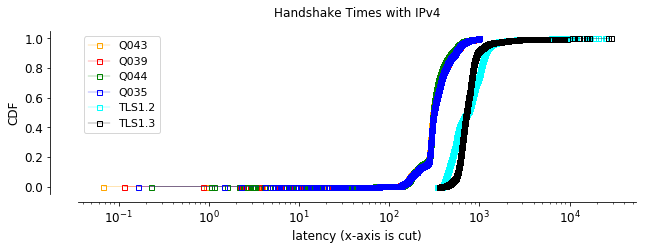

In [110]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_xscale('log')
#ax.set_ylim([0,1.05])
#ax.set_xlim([0, 500])
#ax.set_xscale('linear')
#ax.set_xscale('symlog')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/India/handshake_times_ipv4.png', format='png', bbox_inches='tight')


In [111]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [112]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:309.284000

90th Percentile:533.475000

99th Percentile:799.638000

25th Percentile:282.773000

75th Percentile:388.515000

20th Percentile:309.284000

40th Percentile:533.475000

60th Percentile:799.638000

80th Percentile:282.773000

-----------------------------

-----------------------------

percentile values distribution for tcp12

50th Percentile:736.315000

90th Percentile:1155.395000

99th Percentile:2301.898000

25th Percentile:522.120000

75th Percentile:993.161000

20th Percentile:736.315000

40th Percentile:1155.395000

60th Percentile:2301.898000

80th Percentile:522.120000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:305.006000

90th Percentile:487.284000

99th Percentile:760.569000

25th Percentile:283.717000

75th Percentile:365.275000

20th Percentile:305.006000

40th Percentile:487.284000

60th Percentile:7

In [113]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

In [114]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [115]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:677.658000

90th Percentile:912.534000

99th Percentile:986.905000

25th Percentile:549.162000

75th Percentile:770.920000

20th Percentile:677.658000

40th Percentile:912.534000

60th Percentile:986.905000

80th Percentile:549.162000

-----------------------------

-----------------------------

percentile values distribution for tcp12

50th Percentile:1176.410000

90th Percentile:2129.062000

99th Percentile:5291.234000

25th Percentile:871.180000

75th Percentile:1613.191000

20th Percentile:1176.410000

40th Percentile:2129.062000

60th Percentile:5291.234000

80th Percentile:871.180000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:688.179000

90th Percentile:919.443000

99th Percentile:988.625000

25th Percentile:575.708000

75th Percentile:776.698000

20th Percentile:688.179000

40th Percentile:919.443000

60th Percentil

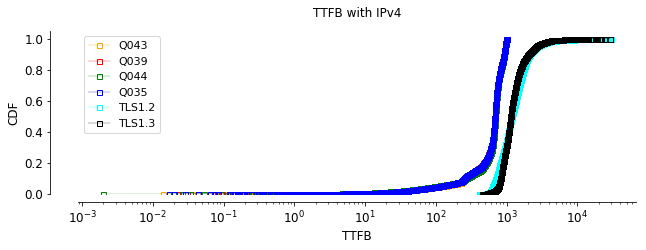

In [116]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,3000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/India/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [117]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

In [118]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [119]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:677.462000

90th Percentile:914.042000

99th Percentile:988.063000

25th Percentile:529.775000

75th Percentile:767.307000

20th Percentile:677.462000

40th Percentile:914.042000

60th Percentile:988.063000

80th Percentile:529.775000

-----------------------------

-----------------------------

percentile values distribution for tcp12

50th Percentile:1432.550000

90th Percentile:2916.134000

99th Percentile:7211.325000

25th Percentile:1003.796000

75th Percentile:2079.828000

20th Percentile:1432.550000

40th Percentile:2916.134000

60th Percentile:7211.325000

80th Percentile:1003.796000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:686.901000

90th Percentile:918.524000

99th Percentile:989.219000

25th Percentile:543.812000

75th Percentile:771.122000

20th Percentile:686.901000

40th Percentile:918.524000

60th Percent

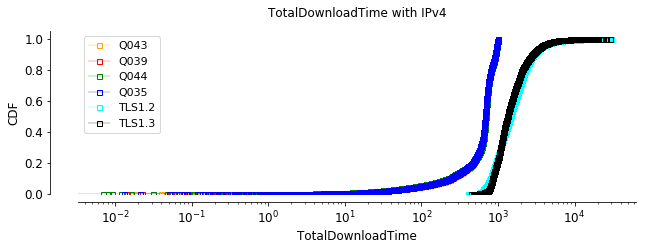

In [120]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,3000])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/India/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')